In [1]:
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense 
import matplotlib. pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from keras.layers import Activation, Dense, Dropout 
from keras import optimizers 
from pandas import Series 
import pandas as pd 
import numpy
data = pd. read_csv ('/content/BTC-USD.csv') 
data = data.set_index(pd.DatetimeIndex(data['Date']))['Close'] 
def difference (dataset, interval = 1): 
     diffList = list ()
     for i in range (interval, len(dataset)): 
       num = dataset[i] - dataset[i - interval] 
       diffList.append(num)
backView = 3 

In [2]:
def create_dataset (dataset, backView = 1): 
  dataX, dataY = [], [] 
  for i in range(len(dataset) - backView - 1): 
    a = dataset[i:(i + backView), 0] 
    dataX.append(a) 
    dataY.append(dataset[i + backView, 0]) 
  return numpy.array(dataX), numpy.array(dataY) 

In [3]:
# fix random seed for reproducibility 
numpy.random.seed(0) 
# loading dataset 
dataframe = data 
dataset = dataframe.values 
dataset = dataset.astype('float64').reshape(-1, 1) 
# Normalizing dataset 


In [4]:
scaler = MinMaxScaler () 
dataset = scaler.fit_transform(dataset) 
# split into train and test sets 
train_size = int(len(dataset) * 0.67) 
test_size = len(dataset) - train_size
train, test = dataset [0: train_size:], dataset [train_size: len(dataset),:] 
# reshape into Y = t + 1 and X = t 
trainX, trainY = create_dataset (train, backView) 
testX, testY = create_dataset (test, backView) 
# reshape input to [samples, time steps, features] 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 
# create and fit the LSTM network 
model = Sequential () 
model.add(LSTM(256, return_sequences = True, input_shape = (1, backView))) 
model.add(LSTM(256)) 


In [5]:
model.add (Dense (1)) 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX, trainY, epochs = 50, verbose = 1, shuffle = False, batch_size = 50) 
# make predictions 
trainPredict = model.predict(trainX) 
testPredict = model.predict(testX) 
# invert predictions 
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
train, test = dataset [0: train_size:], dataset[train_size: len(dataset), :] 
# reshape into Y = t + 1 and X = t 
trainX, trainY = create_dataset (train, backView) 
testX, testY = create_dataset (test, backView) 
# reshape input to [samples, time steps, features] 
trainX = numpy. reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 
# create and fit the LSTM network 


Epoch 1/50
5/5 [==============================] - 7s 32ms/step - loss: 0.0584
Epoch 2/50
5/5 [==============================] - 0s 31ms/step - loss: 0.0310
Epoch 3/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0083
Epoch 4/50
5/5 [==============================] - 0s 41ms/step - loss: 0.0036
Epoch 5/50
5/5 [==============================] - 0s 36ms/step - loss: 0.0083
Epoch 6/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0049
Epoch 7/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0037
Epoch 8/50
5/5 [==============================] - 0s 30ms/step - loss: 0.0036
Epoch 9/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0027
Epoch 10/50
5/5 [==============================] - 0s 30ms/step - loss: 0.0023
Epoch 11/50
5/5 [==============================] - 0s 38ms/step - loss: 0.0026
Epoch 12/50
5/5 [==============================] - 0s 33ms/step - loss: 0.0024
Epoch 13/50
5/5 [==============================] - 0s 36ms/st

In [6]:
model = Sequential() 
model.add (LSTM (256, return_sequences = True, input_shape = (1, backView))) 
model.add (LSTM (256)) 
model.add(Dense (1)) 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.fit(trainX, trainY, epochs = 50, verbose = 1, shuffle = False, batch_size = 50) 
# make predictions 
trainPredict = model.predict(trainX) 
testPredict = model.predict(testX) 
# invert predictions 
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])

Epoch 1/50
5/5 [==============================] - 7s 18ms/step - loss: 0.0575
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0299
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0077
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0038
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0082
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0047
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0036
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0036
Epoch 9/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0026
Epoch 10/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0023
Epoch 11/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 12/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0023
Epoch 13/50
5/5 [==============================] - 0s 18ms/st

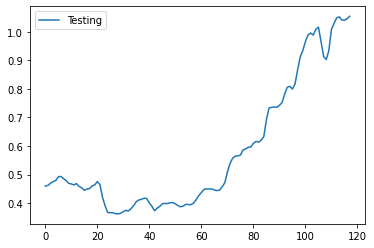

In [15]:
# testPredictPlot=[[]]
# i= int(len(trainPredict)+(backView*2)+1)
# j= int(len(dataset)-1)
# # testPredictPlot[[i:j],[:]]=testPredict 
# testPredictPlot[:, :] = list(numpy.nan)
# testPredictPlot[0:,0:] = numpy.nan
plt.plot(testPredict, label = 'Testing') 
plt.legend() 

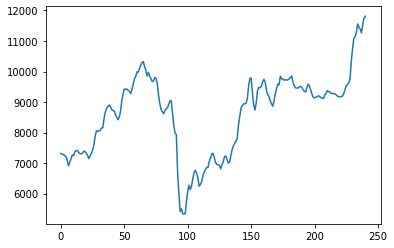

In [18]:
plt.plot(trainPredict, label = 'Training') 

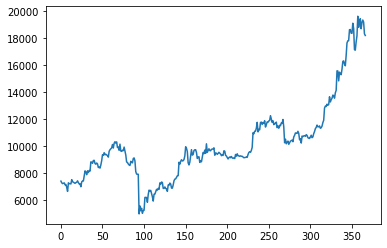

In [19]:
plt. plot(scaler.inverse_transform(dataset), label = 'Actual') 

In [20]:
from datetime import datetime 
import pandas as pd 
import requests 
def convertTimeStampToUTC(data): 
  return datetime.fromtimestamp(data) 
def get_URL (apiKey, cryptoSymbol, frequency, timestamp, maxRecords): 
  API_KEY = '&api_key=' + str(apiKey)   
  limit = '&limit=' + str(maxRecords) 
  header = 'fsym=' + str(cryptoSymbol) 
  currency = '&tsym=USD' 
  if (timestamp == ""): 
    URL = 'https://min-api.cryptocompare.com/data/v2/histo' + frequency + '?' + header 
  else:
    URL = 'https://min-api.cryptocompare.com/data/v2/histo' + frequency + '?' + header + '&toTs=' + str(timestamp)
  return URL + currency + API_KEY + limit   

In [21]:
from requests.sessions import get_auth_from_url
def getCryptoData(apiKey, crypto, frequency, numOfRequests, maxRecords): 
  numOfRequests = 5 
  data = pd.DataFrame() 
  nextTimeStamp = 0 
  for i in range(0, numOfRequests): 
    if (nextTimeStamp == 0): 
      url = get_URL(apiKey, crypto, frequency, "", maxRecords) 
    else: 
      url = get_URL(apiKey, crypto, frequency, nextTimeStamp, maxRecords) 
  response = requests.get(url).json() 
  partialData = pd.DataFrame(response.get('Data').get('Data')) 
  nextTimeStamp = partialData['time'].min() - 1 
  data = pd.concat([data, partialData]) 
  data = data.sort_values (by = ['time'],ignore_index = True) 
  data['timeUTC'] = data['time'].apply(convertTimeStampToUTC) 
  data = data. reset_index (drop = True) 
  return data

In [22]:
API_KEY = ""
crypto = "BTC" 
numOfRequests = 5 
maxRecords = 200 
frequency = "hour" 
cryptoData = getCryptoData(API_KEY, crypto, frequency, numOfRequests, maxRecords) 
cryptoData 
API_KEY = "" 
crypto = "BTC" 
numOfRequests = 5 
maxRecords = 200 
frequency = "day" 
cryptoData = getCryptoData(API_KEY, crypto, frequency, numOfRequests, maxRecords) 
cryptoData 
API_KEY = "" 
crypto = "BTC" 
numOfRequests = 5 
maxRecords = 200 


In [23]:
frequency = "minute" 
cryptoData = getCryptoData(API_KEY, crypto, frequency, numOfRequests, maxRecords) 
cryptoData

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timeUTC
0,1664028180,19112.74,19102.09,19106.43,24.390,466089.94,19108.59,direct,,2022-09-24 14:03:00
1,1664028240,19109.09,19101.59,19108.59,12.300,235021.64,19102.42,direct,,2022-09-24 14:04:00
2,1664028300,19125.87,19101.05,19102.42,20.270,387627.97,19120.66,direct,,2022-09-24 14:05:00
3,1664028360,19121.05,19089.47,19120.66,33.610,642208.52,19089.47,direct,,2022-09-24 14:06:00
4,1664028420,19091.24,19060.15,19089.47,90.580,1727375.35,19071.81,direct,,2022-09-24 14:07:00
...,...,...,...,...,...,...,...,...,...,...
196,1664039940,19132.45,19113.29,19131.43,19.050,364264.52,19113.86,direct,,2022-09-24 17:19:00
197,1664040000,19126.46,19112.24,19113.86,9.464,180956.09,19123.53,direct,,2022-09-24 17:20:00
198,1664040060,19136.48,19119.95,19123.53,18.180,347897.54,19136.13,direct,,2022-09-24 17:21:00
199,1664040120,19142.77,19136.13,19136.13,6.296,120488.29,19137.29,direct,,2022-09-24 17:22:00
